<a href="https://colab.research.google.com/github/muhamadrefo/ImageClassificationColab/blob/master/LearnSVMHere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix as cm
from sklearn import model_selection
from sklearn.model_selection import train_test_split as tt, GridSearchCV
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
#filtered dataset
%cd /content/drive/My Drive/TestingPlace/PlaceofDatabase/CNN/

/content/drive/My Drive/TestingPlace/PlaceofDatabase/CNN


In [4]:
import pandas as pd

dataTrain = pd.read_csv('DataTraining.csv')

accuracy: 64.70588235294117%


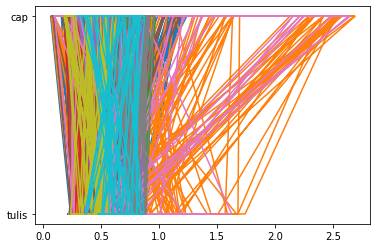

In [11]:
X = dataTrain.iloc[:, 1:6].values
y = dataTrain.iloc[:, 7].values

# Split data to train and test on 80-20 ratio
X_train, X_test, y_train, y_test = tt(X,y, test_size= 0.2, random_state=4)

# Plot training and test data
plt.plot(X_train, y_train, X_test, y_test)

#create a linear SVM classifier
clf = SVC(kernel='linear')

# train classifier
clf.fit(X_train, y_train)

# make prediction
clfPredict = clf.predict(X_test)
print('accuracy: {}%'.format(clf.score(X_test, y_test)*100))
#print('accuracy:', accuracy_score(y_test, clfPredict))

In [12]:
#using linear classifier but Separable data with noise

#                                                           clf = SVC(kernel='linear', C=100.0 or C=1.0) 

#say if u set C to be a low value (say 1), the SVM classifier will choose a large margin dicision boundary at the expense of larger number of misclassifications
#but when C is set to a high value (say 100), the classifier will choose a low margin decision boundary and try to minimize the misclassifications.
#so when choosing value of C, u can think noisy of your data. if u think the data is very noisy, u need C to be small.
#but when u think the data is less noisy, u need C to be large
#in this case, we can't see the plot of dataset, since its divided by 8 features,  when u using another dataset it will seen as dotted lines
#the larger the space between the dottd lines, the larger is the margin

In [13]:
#The module sklearn.model_selection allows us to do a grid search over parameters using GridSearchCV. 
#All we need to do is specify which parameters we want to vary and by what value. 
#Every combination of C and gamma is tried and the best one is chosen based. The best estimator can be accessed using clf.best_estimator_

#GridSearch
#Make parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10]}

#Make grid search classifier
clf_grid = GridSearchCV(SVC(), param_grid, verbose=1)

#train the classifier
clf_grid.fit(X_train, y_train)

#looking for grid best_estimator

print('Best Parameter:\n ', clf_grid.best_params_)
print('Best Estimator:\n ', clf_grid.best_estimator_)

#By default, GridSearchCV performs 3-fold cross-validation. 
#In other words, it divides the data into 3 parts and uses two parts for training, and one part for determining accuracy. 
#This is done three times so each of the three parts is in the training set twice and validation set once. 
#The accuracy for a given C and gamma is the average accuracy during 3-fold cross-validation.

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Parameter:
  {'C': 100, 'gamma': 10}
Best Estimator:
  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


In [14]:
#create a linear SVM classifier
clf = SVC(kernel='linear', C=100.0, gamma=10)

# train classifier
clf.fit(X_train, y_train)

# make prediction
clfPredict = clf.predict(X_test)
print('accuracy: {}%'.format(clf.score(X_test, y_test)*100))

accuracy: 65.88235294117646%


accuracy: 72.94117647058823%


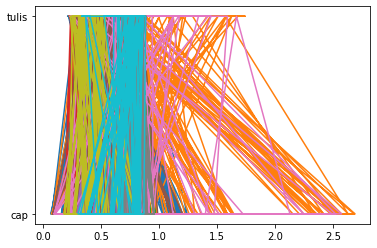

In [24]:
#reminder, when u change values of random_state, u gonna find new accuracy of ur data too
X_train, X_test, y_train, y_test = tt(X,y, test_size= 0.2, random_state=3)

# Plot training and test data
plt.plot(X_train, y_train, X_test, y_test)

#create a linear SVM classifier
clf = SVC(kernel='linear')

# train classifier
clf.fit(X_train, y_train)

# make prediction
clfPredict = clf.predict(X_test)
print('accuracy: {}%'.format(clf.score(X_test, y_test)*100))

accuracy: 69.76744186046511%


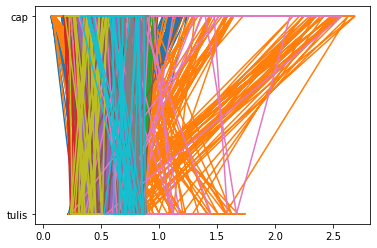

In [34]:
#when using dataset on 90% training and 10% test
#reminder, when u change values of random_state, u gonna find new accuracy of ur data too
X_train, X_test, y_train, y_test = tt(X,y, test_size= 0.1, random_state=3)

# Plot training and test data
plt.plot(X_train, y_train, X_test, y_test)

#create a linear SVM classifier
clf = SVC(kernel='linear', C=100.0, gamma=10)

# train classifier
clf.fit(X_train, y_train)

# make prediction
clfPredict = clf.predict(X_test)
print('accuracy: {}%'.format(clf.score(X_test, y_test)*100))